<a href="https://colab.research.google.com/github/Navaneeth2906/nm803_ads_2024/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3

### [Carl Henrik Ek](http://carlhenrik.com/), University of Cambridge

### [Radzim Sendyka](https://www.cst.cam.ac.uk/people/rs2071), University of Cambridge

### [Christian Cabrera](https://www.cst.cam.ac.uk/people/chc79), University of Cambridge

### 2024-11-18

The check Session for this Practical is 21 November 2024

Prerequisite: Practical 1, Practical 2

**Abstract:**

In this worksheet we will look at linear models. We will show a general framework for formulating models where the we have a set of response variables that we want to explain through a linear relation- ship from a set of explanatory variables. While many relationships are non-linear in nature it is often challenging to interpret and explain the results from non-linear models. Therefore, linear models remains very important as they provide a nice trade-off between explanation of the data while at the same time providing interpretable semantics.


# Generalised Linear Models

We have a set of explanatory variables $x \in X$ and a set of response variables $y \in Y$. The data is provided to us in pairs $D = \{x_i, y_i\}_N$ where $x_i$ and $y_i$ are in correspondence. Our aim is to build a model that allows us to predict the response variable $y_i$ from its corresponding explanatory variable $x_i$.

Linear regression makes the assumption that the relationship between the response variable and the explanatory variable can be written as a linear combination. Furthermore, it assumes that the observations of the response variable have been corrupted by an additive Gaussian noise process,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + E,
$$

where $E \sim \mathcal{N}(0, \sigma^2)$.

While both the explanatory and response variable are deterministic, due to the noise corrupting the observations, our predictions under the model are random. In order to extract a point estimate we therefore take the expected value,

$$
\mathbb{E}[y_i | x_i] = \mathbb{E} \left( \sum_{i=1}^{d} \beta_i x_{id} + E \right)
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + \mathbb{E}[E]
$$

$$
= \sum_{i=1}^{d} \beta_i x_{id} + 0.
$$


Traditionally the linear regression model above is motivated by an additive noise assumption that corrupts the observed response. An equivalent explanation is to absorb the noise directly into the response variable and consider it a linear model of a
normal distributed response,

$$
y_i = \sum_{i=1}^{d} \beta_i x_{id} + \varepsilon,
$$

$$
y_i + \varepsilon = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i = \sum_{i=1}^{d} \beta_i x_{id},
$$

$$
\hat{y}_i \sim \mathcal{N} \left( y_i, \sigma^2 \right) = \mathcal{N} \left( \sum_{i=1}^{d} \beta_i x_{id}, \sigma^2 \right),
$$

where, as we previously derived, the linear predictor directly parametrises the mean or the first moment of
the random response variable.

If we want to generalise the setting, we can think of scenarios where the response variable follows a different distribution. This could be a Bernoulli distributed response, as in binary classification, or Poisson distributed if we are describing discrete events. Specifically, we will look at models where the first moment of the response variable can be parametrised as a function of a linear combination of the explanatory variables,

$$
g(\mathbb{E}[y_i | x_i]) = \sum_{i=1}^{d} \beta_i x_{id},
$$

where the function $g(\cdot)$ is known as a link function, connecting the expected value and the linear predictor (for the linear regression case above the link function is the identity).

While the above formulation is the one that is most commonly used in the statistics literature, in a machine learning setting we can think of a transformation of a linear mapping as

$$
\mathbb{E}[y_i | x_i] = g^{-1} \left( \sum_{i=1}^{d} \beta_i x_{id} \right),
$$

If you are familiar with simple compositional function models, such as neural networks, you can see how these are recursive formulations of similar structures. An article that describes neural networks in the light of the models we will describe can be found [here](https://towardsdatascience.com/glms-part-iii-deep-neural-networks-as-recursive-generalized-linear-URL).


The class of models that can be described using the equations above are commonly referred to as Generalised Linear Models (GLM) (McCullagh et al., 1989), where the generalisation comes from the fact that we consider the response variable to follow an Exponential Dispersion Family distribution ([wiki](https://en.wikipedia.org/wiki/Exponential_dispersion_model)). This family is a rich class of probability distributions that contains most of the distributions you may be familiar with. Each distribution is defined through two parameters: the location parameter and a scale parameter. The link function plays the role of "linking" the value of the linear predictor to the location parameter of the distribution.

Many classical statistical models can be written in the language of generalised linear models. Below, a list of models that fall into this category is shown ([source](https://online.stat.psu.edu/stat504/lesson/6/6.1)). Each model is characterised by three different components: an exponential dispersion family distribution of the response, a link function, and a linear predictor from the explanatory variables.

<div align="center">

| Model                | Response Variable | Link              | Explanatory Variable |
|----------------------|-------------------|-------------------|-----------------------|
| Linear Regression    | Normal           | Identity          | Continuous            |
| Logistic Regression  | Binomial         | Logit             | Mixed                 |
| Poisson Regression   | Poisson          | Log               | Mixed                 |
| ANOVA                | Normal           | Identity          | Categorical           |
| ANCOVA               | Normal           | Identity          | Mixed                 |
| Loglinear            | Poisson          | Log               | Categorical           |
| Multinomial Response | Multinomial      | Generalized Logit | Mixed                 |


The exponential dispersion family can be written in the following canonical form,

$$
f(y; \theta, \phi) = \exp \left( \frac{\theta y - b(\theta)}{a(\phi)} + c(y, \phi) \right),
$$

where $\theta$ is the location and $\phi$ the scale parameter, respectively. A special instantiation of this is the Gaussian distribution,

$$
f(y; \mu, \sigma^2) = \exp \left( \frac{\mu y - \frac{1}{2} \mu^2}{\sigma^2} - \frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2\pi\sigma^2) \right),
$$

where we can identify,

$$
\theta = \mu
$$

$$
\phi = \sigma^2
$$

$$
b(\theta) = \frac{1}{2} \theta^2
$$

$$
a(\phi) = \phi
$$

$$
c(y, \phi) = \frac{y^2}{2\phi} - \frac{1}{2} \ln(2\pi\phi)
$$

The benefit of writing the distribution in this general form is that we can easily derive a general expression for both the first and the second moments of the predictive distribution,

$$
\mathbb{E}[y | x] = \frac{\partial}{\partial \theta} b(\theta)
$$

$$
\mathbb{V}[y | x] = a(\phi) \frac{\partial^2}{\partial \theta^2} b(\theta).
$$

This means that given a GLM, we can compute predictions and our uncertainty about those predictions in closed form. We will now proceed to look at how we can fit these models to data and learn the parameters $\beta$ that connect the explanatory variables with the response.


# Learning Generalised Linear Models

Fitting the GLM models described above to data implies learning the parameters $\beta$ of the linear predictor. We will do so by finding the maximum likelihood estimate. By specifying the distribution of the response variable, we have in effect specified a likelihood of each individual data-point. To reach the joint likelihood of each response variable, we will make the assumption that each observed response is conditionally independent given the parameters and the explanatory variables. This leads to the following objective function,

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta).
$$

GLM models are very well studied in the literature, and many different highly efficient approaches exist for fitting the parameters to data. While this is an interesting topic in itself, it is beyond the scope of this course. Instead, we will put our trust in the very well-documented library [Statsmodels](https://www.statsmodels.org) rather than implementing this ourselves.

Below, the code for implementing two separate GLM models is shown. The data is count data, and the most suitable model would be a Poisson regression model for this type. In addition, we also include a standard Gaussian linear model with a single parameter parametrising the slope of the line.

The output figure will show the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted lines shows the 95% confidence interval for the **parameters** of the fit. We should see the fit is (not surprisingly) much worse for the Gaussian model compared to the Poisson.

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

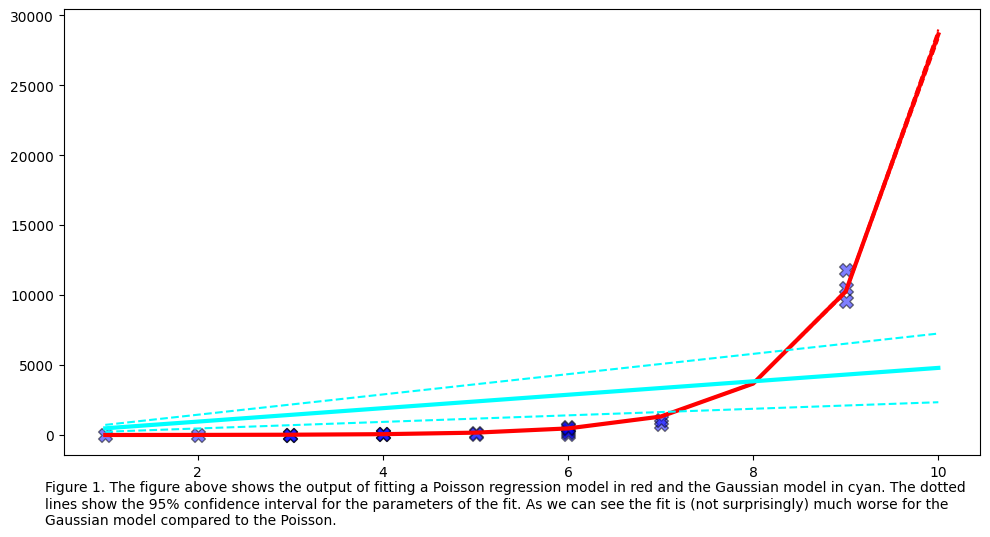

In [5]:
# generate data
x = np.array([[i] for i in np.random.choice(range(1,10), 20)])
y = np.array([np.exp(i) + np.random.normal(0,0.25*np.exp(i),1)[0] for i in x])

# make sure that the values are positive
y[y<0] = 0

# create models
m_poisson = sm.GLM(y,x, family=sm.families.Poisson())
m_poisson_results = m_poisson.fit()

m_gaussian = sm.GLM(y,x, family=sm.families.Gaussian())
m_gaussian_results = m_gaussian.fit()

# prediction
x_pred = np.arange(1,11).reshape(-1,1)
y_pred = m_poisson_results.get_prediction(x_pred).summary_frame(alpha=0.05)

y_pred_gaussian = m_gaussian_results.get_prediction(x_pred).summary_frame(alpha=0.05)

# plot results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

plt.scatter(x,y,marker='X',color='blue',edgecolor='black',s=100,alpha=0.5,zorder=1)

plt.plot(x_pred,y_pred['mean'],color='red',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred['mean_ci_lower'], color='red',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred['mean_ci_upper'], color='red',linestyle='--',zorder=2)

plt.plot(x_pred,y_pred_gaussian['mean'],color='cyan',linewidth=3.0,zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_lower'], color='cyan',linestyle='--',zorder=2)
plt.plot(x_pred,y_pred_gaussian['mean_ci_upper'], color='cyan',linestyle='--',zorder=2)

fig.text(.05, -.06, "Figure 1. The figure above shows the output of fitting a Poisson regression model in red and the Gaussian model in cyan. The dotted\nlines show the 95% confidence interval for the parameters of the fit. As we can see the fit is (not surprisingly) much worse for the\nGaussian model compared to the Poisson.")

plt.tight_layout()

The important part of the code above is the `m_poisson = sm.GLM(y,x, family=sm.families.Poisson())` call where we specify the distribution of the of the response variable. Statsmodels currently implements the following distributions, Binomial, Gamma, Gaussian, InverseGaussian, NegativeBinomial, Poisson, Tweedie which should give you a rich playground of models to work with.

# Basis-function Models

In the framework we have described above, the linear prediction is directly on the explanatory variables. However, we can generalise this slightly if we instead want to perform the regression over a set of basis functions. In statistics, we often refer to the matrix of the explanatory variables as the design matrix of the data. We can easily "design" a matrix that maps the explanatory variables to a "feature space" and then perform the regression over this domain instead.

In Figure 1, the cyan plot uses only a single parameter in its prediction and is therefore only able to parametrise lines that intersect at $(0, 0)$. In order to also parametrise the intersection of the line in the model, we require an expansion of the input domain with a constant one, as follows:

$$
X =
\begin{bmatrix}
x_0 & 1 \\
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1 \\
\end{bmatrix}
$$

Using the above as the explanatory variables, we will be able to fit both the intersection and the slope. However, we can take this concept further and generalise this to perform regression over a different expanded explanatory space. Say that we know that the relationship between the response and the explanatory variables is:

$$
y = \beta_0 \sin(x) + \beta_1 \sin\left(\frac{x^2}{40}\right) + \beta_2 x.
$$

We can now create a new design matrix that includes all the functions we need and apply the GLM framework as before:

$$
\begin{bmatrix}
\sin(x_0) & \sin\left(\frac{x_0^2}{40}\right) & x_0 \\
\sin(x_1) & \sin\left(\frac{x_1^2}{40}\right) & x_1 \\
\vdots & \vdots & \vdots \\
\sin(x_N) & \sin\left(\frac{x_N^2}{40}\right) & x_N \\
\end{bmatrix}
$$


Below we will implement this using the `OLS` model which is just a Gaussian response and an identity link function. The motivation for using `OLS` rather than `GLM` is that the former provides easier means of analysing
predictions.

The resulting figure shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

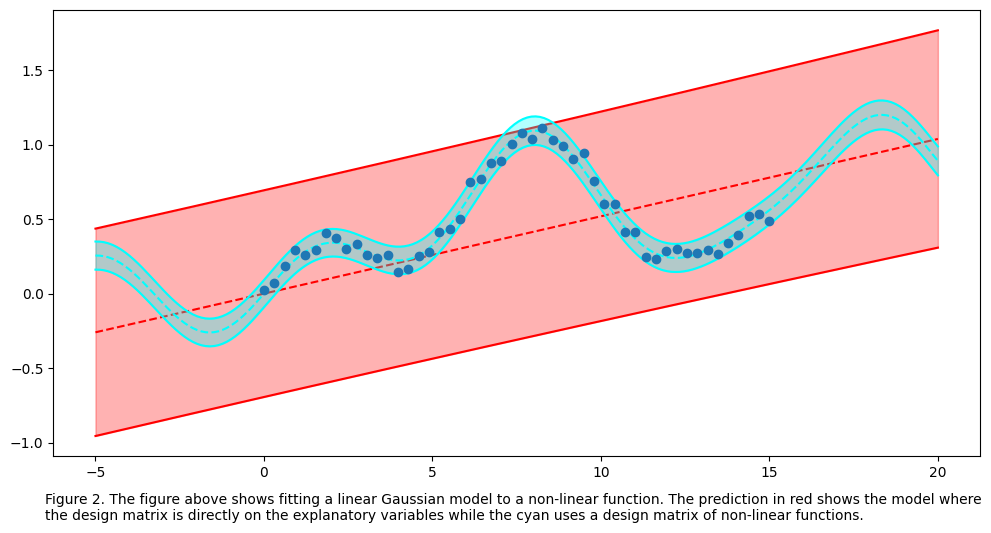

In [7]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with basis functions
design = np.concatenate((np.sin(x).reshape(-1, 1), np.sin(x**2 / 40).reshape(-1, 1), x.reshape(-1, 1)), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred), np.sin(x_pred**2 / 40), x_pred), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 2. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()


The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction
in red shows the model where the design matrix is directly on the explanatory variables while the cyan uses
a design matrix of non-linear functions.

In [8]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        08:15:38   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Furthermore, if we look at the log-likelihood of the two models we can see that it is substantially higher
for the second models compared to the first. This indicates, as we can see visually, that the second design
matrix results in a much better fit to the data.

While the example above worked well maybe it felt a bit contrived as we basically needed to know the function a-priori. So how about using a design matrix with additional basis function $-np.sin(x)$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

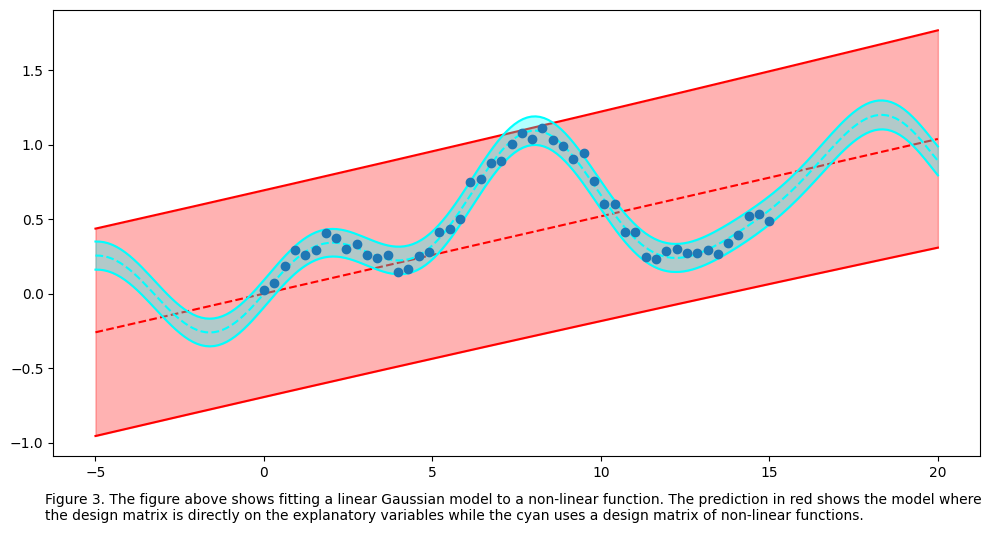

In [10]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Fit a simple linear model
m_linear = sm.OLS(y, x)
results = m_linear.fit()

# Design matrix with additional basis function -np.sin(x)
design = np.concatenate((
    np.sin(x).reshape(-1, 1),
    np.sin(x**2 / 40).reshape(-1, 1),
    x.reshape(-1, 1),
    -np.sin(x).reshape(-1, 1)
), axis=1)
m_linear_basis = sm.OLS(y, design)
results_basis = m_linear_basis.fit()

# Predictions
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((
    np.sin(x_pred),
    np.sin(x_pred**2 / 40),
    x_pred,
    -np.sin(x_pred)
), axis=1)

y_pred_linear = results.get_prediction(x_pred).summary_frame(alpha=0.05)
y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.scatter(x, y, zorder=2)

# Linear model predictions
ax.plot(x_pred, y_pred_linear['mean'], color='red', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_lower'], color='red', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear['obs_ci_upper'], color='red', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear['obs_ci_lower'], y_pred_linear['obs_ci_upper'], color='red', alpha=0.3, zorder=1)

# Basis model predictions
ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)

fig.text(.05, -.05, "Figure 3. The figure above shows fitting a linear Gaussian model to a non-linear function. The prediction in red shows the model where\nthe design matrix is directly on the explanatory variables while the cyan uses a design matrix of non-linear functions.")

plt.tight_layout()
plt.show()

In [11]:
print(results_basis.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              2592.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                    3.49e-52
Time:                        08:15:47   Log-Likelihood:                          85.315
No. Observations:                  50   AIC:                                     -164.6
Df Residuals:                      47   BIC:                                     -158.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As you can see from the the last example if we have multiple possible explanations we end up with a model where there are several symmetric explanations that cannot be differentiated under the objective function.
To overcome we have to encode a *preference* to the solution we want.

# Regularisation

In order to encode a preference towards specific solutions, we will include an additional term in the objective that depends only on the parameters $\beta$. This is commonly done using an $L_p$-norm:

$$
\hat{\beta} = \arg \max_{\beta} \prod_{i=1}^{N} p(y_i | x_i, \beta) + \alpha \left( \sum_{j=1}^{d} |\beta_j|^p \right)^{\frac{1}{p}}.
$$

The two most commonly used norms are the $L_2$, referred to as *ridge regression*, as it encodes a preference towards solutions where the parameters take equally large values, and $L_1$, referred to as *lasso*, as it prefers solutions that "home in" on a few active parameters to explain the data.

The following plot shows the regularisation surfaces of $L_2$ in blue and $L_1$ regularisation in red.

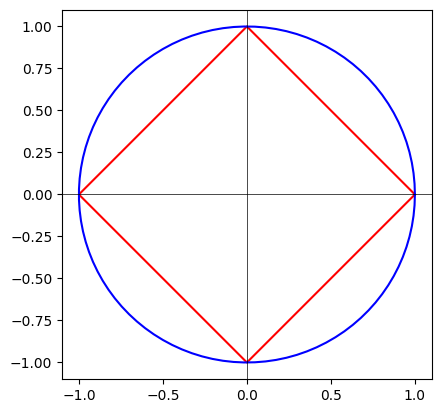

In [12]:
plt.plot([1, 0, -1, 0, 1], [0, 1, 0, -1, 0], 'r')  # L1
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'b')  # L2

plt.gca().set_aspect('equal', 'box'), plt.axhline(0, color='k', linewidth=0.5), plt.axvline(0, color='k', linewidth=0.5)
plt.show()

In `statsmodels` we can use the regularisation above by changing the call to fit the model from `fit` to `fit_regularised`. Taking two additional scalar parameters `alpha` and `L1_wt` where the former sets the strength of regularizer and the latter balances the L1 and L2 regularization.

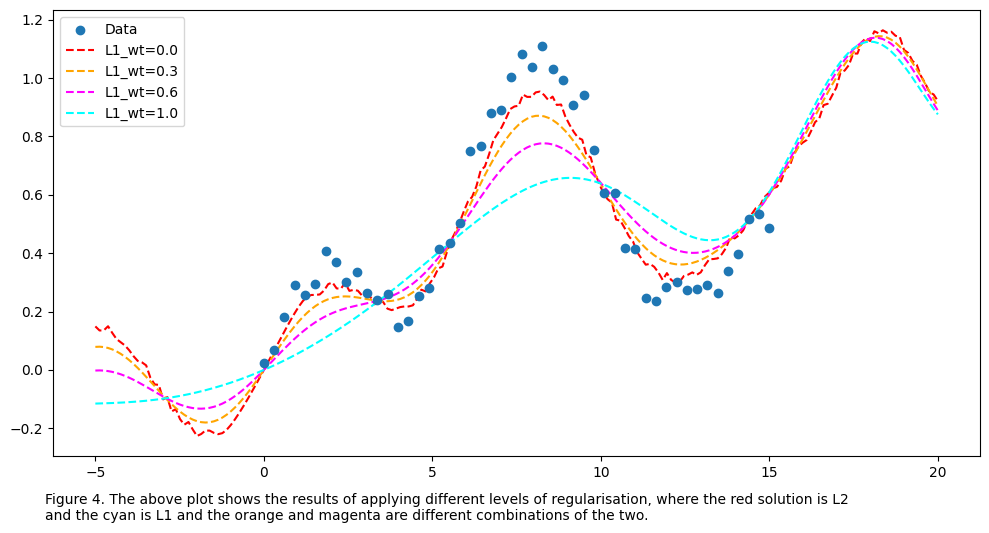

In [13]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Create design matrix
design = np.concatenate((np.sin(x).reshape(-1, 1),
                         np.sin(x**2 / 40).reshape(-1, 1),
                         x.reshape(-1, 1),
                         np.sin(x**2 / 20).reshape(-1, 1),
                         np.sin(x**3).reshape(-1, 1)), axis=1)

# Fit regularized models with different L1 weights
m_linear_basis = sm.OLS(y, design)
results_basis_0 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_basis_1 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_basis_2 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_basis_3 = m_linear_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
design_pred = np.concatenate((np.sin(x_pred),
                              np.sin(x_pred**2 / 40),
                              x_pred,
                              np.sin(x_pred**2 / 20),
                              np.sin(x_pred**3)), axis=1)

# Predictions for each model
y_pred_0 = results_basis_0.predict(design_pred)
y_pred_1 = results_basis_1.predict(design_pred)
y_pred_2 = results_basis_2.predict(design_pred)
y_pred_3 = results_basis_3.predict(design_pred)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, zorder=2, label="Data")
ax.plot(x_pred, y_pred_0, color='red', linestyle='--', zorder=1, label="L1_wt=0.0")
ax.plot(x_pred, y_pred_1, color='orange', linestyle='--', zorder=1, label="L1_wt=0.3")
ax.plot(x_pred, y_pred_2, color='magenta', linestyle='--', zorder=1, label="L1_wt=0.6")
ax.plot(x_pred, y_pred_3, color='cyan', linestyle='--', zorder=1, label="L1_wt=1.0")

ax.legend()
fig.text(.05, -.05, "Figure 4. The above plot shows the results of applying different levels of regularisation, where the red solution is L2\nand the cyan is L1 and the orange and magenta are different combinations of the two.")
plt.tight_layout()
plt.show()

# Localised Basis Functions

Another way to think about designing a set of basis functions is to make them connected to the data, we could think about placing a non-linear transformation of each point

$$
y_i = \sum_{j=1}^{N} \beta_j \, \phi(x_j , x_i)
$$

$$
\phi(x_j , x_i) = e^{- (x_i - x_j)^T (x_i - x_j)}
$$

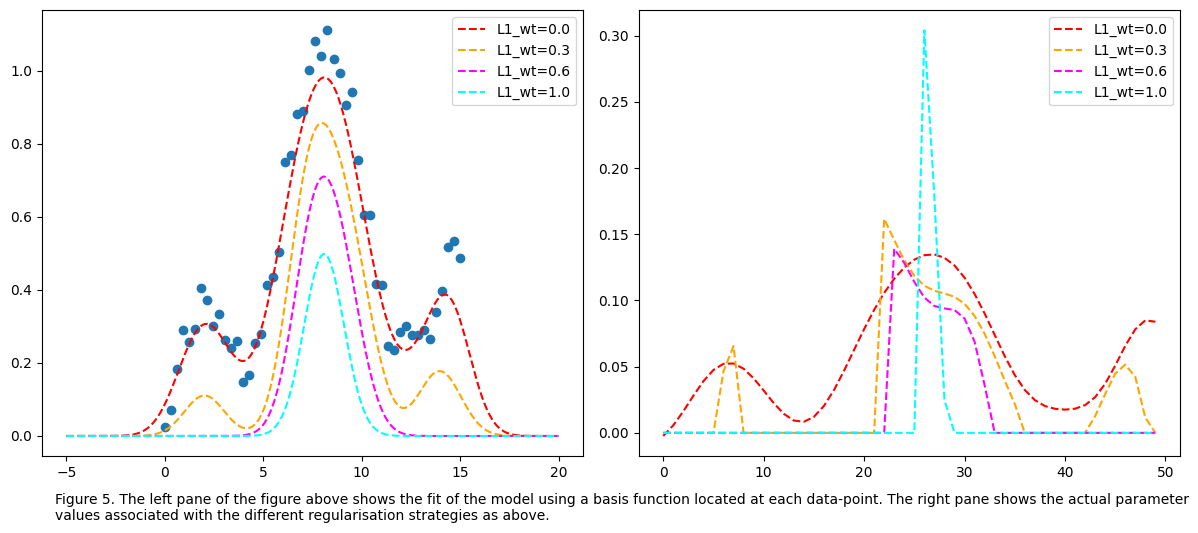

In [14]:
np.random.seed(42)

# Generate data
x = np.linspace(0, 15, 50)
y = 0.2 * np.sin(x) + 0.5 * np.sin(x**2 / 40) + 0.05 * x
y += 0.05 * np.random.randn(x.shape[0])

# Define the RBF kernel function for localized basis functions
def rbf_kernel(x1, x2, length_scale=1.0):
    return np.exp(-((x1 - x2.T) ** 2) / (2 * length_scale ** 2))

# Create the design matrix using RBF kernel
phi = rbf_kernel(x[:, np.newaxis], x[:, np.newaxis])


# Fit regularized models with different L1 weights
m_rbf_basis = sm.OLS(y, phi)
results_rbf_0 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.0)
results_rbf_1 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.3)
results_rbf_2 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=0.6)
results_rbf_3 = m_rbf_basis.fit_regularized(alpha=0.10, L1_wt=1.0)

# Prediction data
x_pred = np.linspace(-5, 20, 200).reshape(-1, 1)
phi_pred = rbf_kernel(x_pred, x)

# Predictions for each model
y_pred_rbf_0 = results_rbf_0.predict(phi_pred)
y_pred_rbf_1 = results_rbf_1.predict(phi_pred)
y_pred_rbf_2 = results_rbf_2.predict(phi_pred)
y_pred_rbf_3 = results_rbf_3.predict(phi_pred)

# Extract parameter values for each model
params_0 = results_rbf_0.params
params_1 = results_rbf_1.params
params_2 = results_rbf_2.params
params_3 = results_rbf_3.params

# Plot model fit and parameter values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model fit with different regularization levels
ax1.scatter(x, y)
ax1.plot(x_pred, y_pred_rbf_0, '--', color='red', label="L1_wt=0.0")
ax1.plot(x_pred, y_pred_rbf_1, '--', color='orange', label="L1_wt=0.3")
ax1.plot(x_pred, y_pred_rbf_2, '--', color='magenta', label="L1_wt=0.6")
ax1.plot(x_pred, y_pred_rbf_3, '--', color='cyan', label="L1_wt=1.0")
ax1.legend()

# Parameter values for each regularization strategy
ax2.plot(range(len(params_0)), params_0, '--', color='red', label="L1_wt=0.0")
ax2.plot(range(len(params_1)), params_1, '--', color='orange', label="L1_wt=0.3")
ax2.plot(range(len(params_2)), params_2, '--', color='magenta', label="L1_wt=0.6")
ax2.plot(range(len(params_3)), params_3, '--', color='cyan', label="L1_wt=1.0")
ax2.legend()

fig.text(.05, -.05, "Figure 5. The left pane of the figure above shows the fit of the model using a basis function located at each data-point. The right pane shows the actual parameter\nvalues associated with the different regularisation strategies as above.")

plt.tight_layout()
plt.show()

As we can see from the figure above, the interpretation of the solution for the localised basis function model changes slightly. What we can now say is something similar to, "how important is each of the training data points for prediction". Especially interesting is the very strongly regularised solution shown in cyan. This can be interpreted as "if we want to predict the data, which is the single most representative point". The notion of a localised basis function can through this interpretation provide a rich explanation that is often very interpretable.

The type of data-centric basis functions that we explained above are very commonly used and if continue your study of machine learning during the year you will see a lot more of these basis functions as they are the foundation of a large range of different models from Support Vector Machines Vapnik, 1999 to Gaussian processes Rasmussen et al., 2006. Importantly as they solve an $N \times N$ regression problem the crucial ingredient is how do we regularise to solution space so that we can recover a solution.


# Applying Model Framework

You should now try out the model framework that we described above on a dataset derived from the 2021 UK Census Dataset.

Let's start by downloading the data.

In [172]:
import requests
import zipfile
import io
import os
import pandas as pd


def download_census_data(code, base_dir=''):
  url = f'https://www.nomisweb.co.uk/output/census/2021/census2021-{code.lower()}.zip'
  extract_dir = os.path.join(base_dir, os.path.splitext(os.path.basename(url))[0])

  if os.path.exists(extract_dir) and os.listdir(extract_dir):
    print(f"Files already exist at: {extract_dir}.")
    return

  os.makedirs(extract_dir, exist_ok=True)
  response = requests.get(url)
  response.raise_for_status()

  with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall(extract_dir)

  print(f"Files extracted to: {extract_dir}")

def load_census_data(code, level='msoa'):
  return pd.read_csv(f'census2021-{code.lower()}/census2021-{code.lower()}-{level}.csv')

In [304]:
download_census_data('TS007') # Age by single year of age

age_df = load_census_data('TS007', level='ltla')
# Preparing the columns we want
age_df = age_df.drop(age_df.columns[[0,2,3,4,10,16,23,28,34,45,61,77,88,99,115]], axis=1).set_index('geography')
age_df.columns = range(100)

Files already exist at: census2021-ts007.


Below we will plot the overall age structure of the UK population in 2021. This profile is not very straightforward, and has historical reasons. Have a look online to understand the data better - you should see a similar chart [here](https://en.wikipedia.org/wiki/Demographics_of_England).

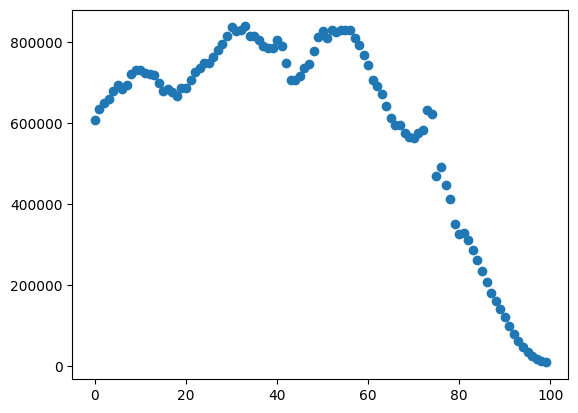

In [155]:
plt.scatter(range(100), age_df.sum(axis=0))
plt.show()

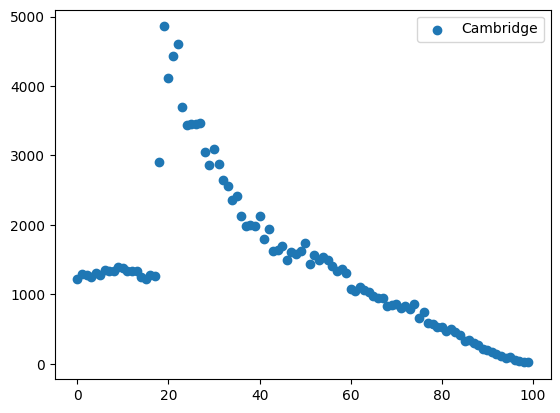

In [156]:
x_values = range(100)

plt.scatter(x_values, age_df.loc['Cambridge'], label='Cambridge')

plt.legend()
plt.show()

The data looks very different when we look at individual cities. For example, Cambridge has a very different age profile than most of the UK.

Now try to use the framework that we have derived to explain the two data-sets above. There is no right or wrong answer here, what we are looking for is a motivation of why you have made the choices that you have made
and how this effects the conclusions that you can draw.

### Exercise 1

Would it make sense to split up the data-set in different regions and fit separate models If so, what is the criteria that you split the data using?

### Exercise 1

Write your answer to exercise 1 here

In [157]:
# Use this box for any code you need
'''
MISUNDERSTANDING OF QUESTION:
In Practical 2, we were able to cluster different cities based on different tags.
I clustered cities based on being a university town, tourism, history and leisure.
It would make sense that as cities in the same cluster are similar, they may also share similar age distributions.
Especially towns like Oxford and Cambridge, which are both university towns and would predominantly have young people.
More residential areas would have more old people and so also demonstrate similar age distributions.
As such, it would perhaps make sense to split the data by area, where we fit different models to areas that share different characteristics.

Similarly, we can partition the given data into clusters based on the similarities of their population distributions.
It would first make sense to normalise each row (as certain areas will have a larger net population) so that we have data for age proportions in different regions.
Since there are 100 different dimensions for each region (100 ages) it make sense to first apply PCA and then cluster by k-means
'''

'''
Splitting by region refers to splitting within the graph.
For the UK population, we see a sharp drop off after 75 so it may make sense to split here. This makes sense as the average life expectancy is around 75.
For the Cambridge data, there are only a few children and their population seems to be uniformally distributed. It make sense to split at 18.
The fact that there are suc few children makese sense since Cambridge is a university town.
'''



'\nIn Practical 2, we were able to cluster different cities based on different tags. \nI clustered cities based on being a university town, tourism, history and leisure. \nIt would make sense that as cities in the same cluster are similar, they may also share similar age distributions.\nEspecially towns like Oxford and Cambridge, which are both university towns and would predominantly have young people.\nMore residential areas would have more old people and so also demonstrate similar age distributions.\nAs such, it would perhaps make sense to split the data by area, where we fit different models to areas that share different characteristics. \n\nSimilarly, we can partition the given data into clusters based on the similarities of their population distributions. \nIt would first make sense to normalise each row (as certain areas will have a larger net population) so that we have data for age proportions in different regions.\nSince there are 100 different dimensions for each region (10

In [216]:
# Normalize each row by the sum of its entries
age_df_normalised = age_df.div(age_df.sum(axis=1), axis=0)


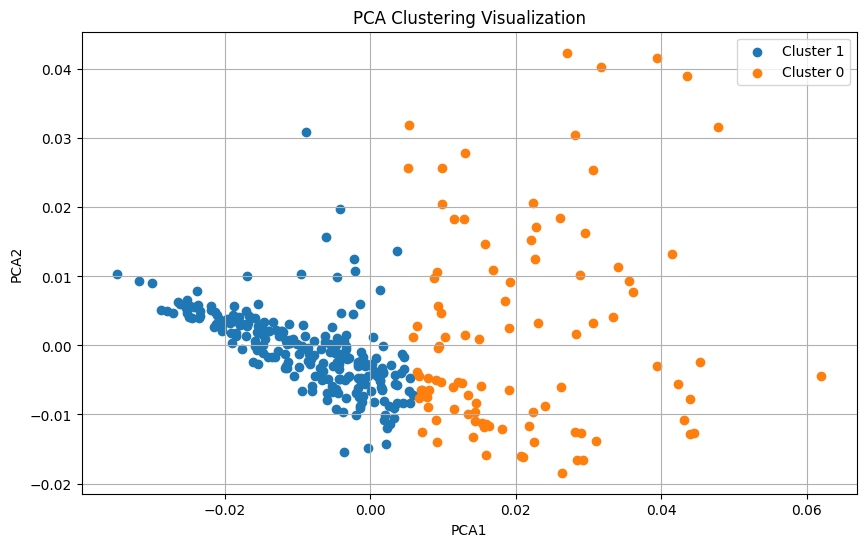

'\nWith normalisation, the data spread is more even.\n'

In [217]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

age_df_clustered = age_df_normalised.copy()



# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(age_df_clustered)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add PCA components and cluster labels to the original DataFrame
age_df_clustered['PCA1'] = pca_data[:, 0]
age_df_clustered['PCA2'] = pca_data[:, 1]
age_df_clustered['Cluster'] = clusters

# Plot the PCA components with cluster labels
plt.figure(figsize=(10, 6))
for cluster in age_df_clustered['Cluster'].unique():
    cluster_data = age_df_clustered[age_df_clustered['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Clustering Visualization')
plt.legend()
plt.grid()
plt.show()

'''
With normalisation, the data spread is more even.
'''

### Exercise 2

What would be a sensible design matrix?

### Exercise 2

Write your answer to exercise 2 here

In [160]:
# Use this box for any code you need

'''
For my design matrix, I feel like it is a good idea to include polynomial basis functions - from constant all the way to cubic.
This is because, population data tends to have a lot of curvature and ups and downs and so it would make sense for a polynomial function to fit it.
I am also adding a sin function (with a period of 30 aka one generation) as it may be common to see some cyclic data - if there are many parents age 30-40 there may
be many children aged 0-10 in the same area.
'''

'''
For the split data, it makes sense to have the above basis function for the split of the data where we have the most population.
For the tail ends of the data (children for Cambridge and elderly for UK) it makes sense to have a simple linear model of a staight line equation.
'''

'\nFor my design matrix, I feel like it is a good idea to include polynomial basis functions - from constant all the way to cubic.\nThis is because, population data tends to have a lot of curvature and ups and downs and so it would make sense for a polynomial function to fit it. \nI am also adding a sin function (with a period of 30 aka one generation) as it may be common to see some cyclic data - if there are many parents age 30-40 there may\nbe many children aged 0-10 in the same area.\n'

### Exercise 3

What GLM models would make sense to fit?

### Exercise 3

Write your answer to exercise 3 here

In [256]:
# Use this box for any code you need

# We fit using an OLS
def fit_ages_to_population(y):

  x = np.array([[i] for i in range(100)])  # ages

  # Design matrix with basis functions
  design = np.concatenate((np.sin(x * (2 * np.pi / 30)).reshape(-1, 1), x.reshape(-1, 1), np.power(x, 3).reshape(-1, 1), np.power(x, 2).reshape(-1, 1), np.ones_like(x).reshape(-1, 1)), axis=1)
  m_linear_basis = sm.OLS(y, design)
  results_basis = m_linear_basis.fit()

  # Predictions
  x_pred = np.linspace(0, 100, 200).reshape(-1, 1)
  design_pred = np.concatenate((np.sin(x_pred * (2 * np.pi / 30)), x_pred, np.power(x_pred, 3), np.power(x_pred, 2), np.ones_like(x_pred)), axis=1)


  y_pred_linear_basis = results_basis.get_prediction(design_pred).summary_frame(alpha=0.05)

  # Plotting
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(x, y, zorder=2)

  ax.plot(x_pred, y_pred_linear_basis['mean'], color='cyan', linestyle='--', zorder=1)
  ax.plot(x_pred, y_pred_linear_basis['obs_ci_lower'], color='cyan', linestyle='-', zorder=1)
  ax.plot(x_pred, y_pred_linear_basis['obs_ci_upper'], color='cyan', linestyle='-', zorder=1)
  ax.fill_between(x_pred.flatten(), y_pred_linear_basis['obs_ci_lower'], y_pred_linear_basis['obs_ci_upper'], color='cyan', alpha=0.3, zorder=1)


  plt.tight_layout()
  plt.show()


In [274]:
#  For completeness I have included code that uses a Gaussian GLM
#  The output mean is the same as the prediction for the OLS - the confidence intervals are however tighter

def fit_ages_to_population(y):
    x = np.array([[i] for i in range(100)])  # ages

    # Design matrix with basis functions
    design = np.concatenate((np.sin(x * (2 * np.pi / 30)).reshape(-1, 1), x.reshape(-1, 1), np.power(x, 3).reshape(-1, 1), np.power(x, 2).reshape(-1, 1), np.ones_like(x).reshape(-1, 1)), axis=1)

    # Fit a Gaussian GLM

    model = sm.GLM(y, design, family=sm.families.Gaussian())
    results = model.fit()

    # Predictions
    x_pred = np.linspace(0, 100, 200).reshape(-1, 1)
    design_pred = np.concatenate((
        np.sin(x_pred * (2 * np.pi / 30)),
        x_pred,
        np.power(x_pred, 3),
        np.power(x_pred, 2),
        np.ones_like(x_pred)
    ), axis=1)

    y_pred = results.get_prediction(design_pred).summary_frame(alpha=0.05)

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x, y, zorder=2, label="Observed Data")

    ax.plot(x_pred, y_pred['mean'], color='cyan', linestyle='--', label="Fitted Mean", zorder=1)
    ax.plot(x_pred, y_pred['mean_ci_lower'], color='cyan', linestyle='-', label="Lower Confidence Interval", zorder=1)
    ax.plot(x_pred, y_pred['mean_ci_upper'], color='cyan', linestyle='-', label="Upper Confidence Interval", zorder=1)
    ax.fill_between(
        x_pred.flatten(),
        y_pred['mean_ci_lower'],
        y_pred['mean_ci_upper'],
        color='cyan',
        alpha=0.3,
        zorder=1
    )

    # Formatting
    ax.set_xlabel("Age")
    ax.set_ylabel("Population")
    ax.legend()
    ax.set_title("Gaussian GLM Fit to Population Data")
    plt.tight_layout()
    plt.show()


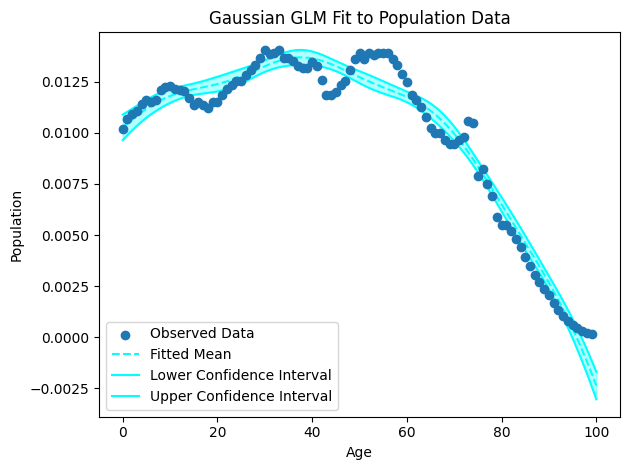

In [275]:
y = age_df.sum(axis=0)
fit_ages_to_population(y/np.sum(y))

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


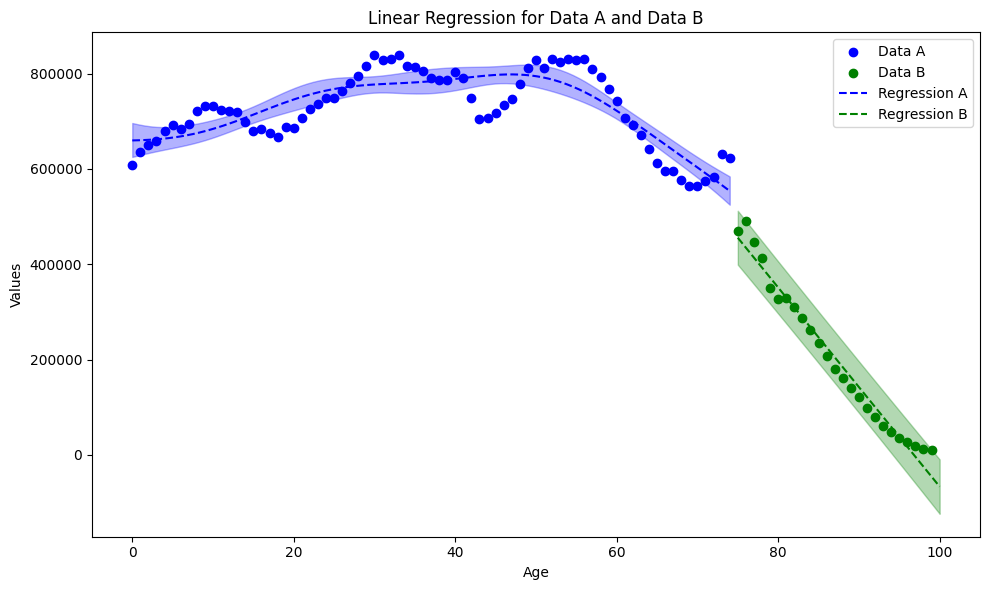

In [277]:
"""Splitting does not make sense for the overall population data"""

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.array([[i] for i in range(100)])  # ages
y = age_df.sum(axis=0)

# Split data into parts 'a' and 'b'
x_a = x[:75]
y_a = y[:75]
x_b = x[75:]
y_b = y[75:]

# Linear regression for part 'a'
x_a_design = np.concatenate(
    (   np.sin(x_a * (2 * np.pi / 30)).reshape(-1, 1),
        x_a.reshape(-1, 1),
        np.power(x_a, 3).reshape(-1, 1),
        np.power(x_a, 2).reshape(-1, 1),
        np.ones_like(x_a).reshape(-1, 1),
    ),
    axis=1,
)
m_linear_a = sm.OLS(y_a, x_a_design)
results_a = m_linear_a.fit()

# Linear regression for part 'b'
x_b_design = np.concatenate((x_b, np.ones_like(x_b)), axis=1)
m_linear_b = sm.OLS(y_b, x_b_design)
results_b = m_linear_b.fit()

# Predictions for part 'a'
x_pred_a = np.linspace(0, 74, 100).reshape(-1, 1)
x_pred_a_design = np.concatenate((   np.sin(x_pred_a * (2 * np.pi / 30)).reshape(-1, 1),
        x_pred_a.reshape(-1, 1),
        np.power(x_pred_a, 3).reshape(-1, 1),
        np.power(x_pred_a, 2).reshape(-1, 1),
        np.ones_like(x_pred_a).reshape(-1, 1),
    ), axis=1)
y_pred_a = results_a.get_prediction(x_pred_a_design).summary_frame(alpha=0.05)

# Predictions for part 'b'
x_pred_b = np.linspace(75, 100, 200).reshape(-1, 1)
x_pred_b_design = np.concatenate((x_pred_b, np.ones_like(x_pred_b)), axis=1)
y_pred_b = results_b.get_prediction(x_pred_b_design).summary_frame(alpha=0.05)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plots
ax.scatter(x_a, y_a, color='blue', label='Data A', zorder=2)
ax.scatter(x_b, y_b, color='green', label='Data B', zorder=2)

# Part 'a' regression line and confidence intervals
ax.plot(x_pred_a, y_pred_a['mean'], color='blue', linestyle='--', label='Regression A', zorder=1)
ax.fill_between(
    x_pred_a.flatten(),
    y_pred_a['obs_ci_lower'],
    y_pred_a['obs_ci_upper'],
    color='blue',
    alpha=0.3,
    zorder=1,
)

# Part 'b' regression line and confidence intervals
ax.plot(x_pred_b, y_pred_b['mean'], color='green', linestyle='--', label='Regression B', zorder=1)
ax.fill_between(
    x_pred_b.flatten(),
    y_pred_b['obs_ci_lower'],
    y_pred_b['obs_ci_upper'],
    color='green',
    alpha=0.3,
    zorder=1,
)

# Plot formatting
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Values")
ax.set_title("Linear Regression for Data A and Data B")
plt.tight_layout()
plt.show()


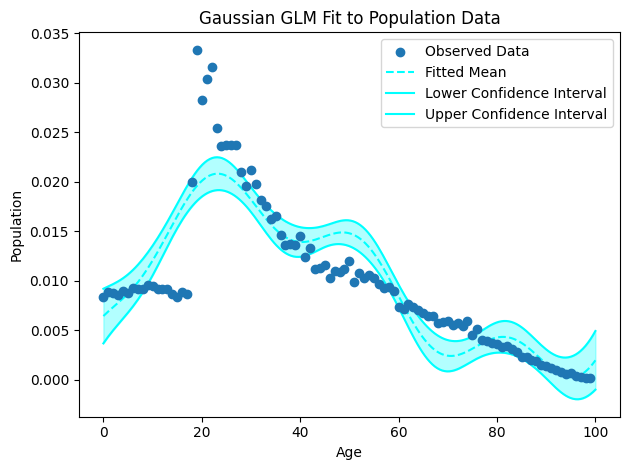

In [259]:
y = age_df.loc['Cambridge']
fit_ages_to_population(y/np.sum(y))

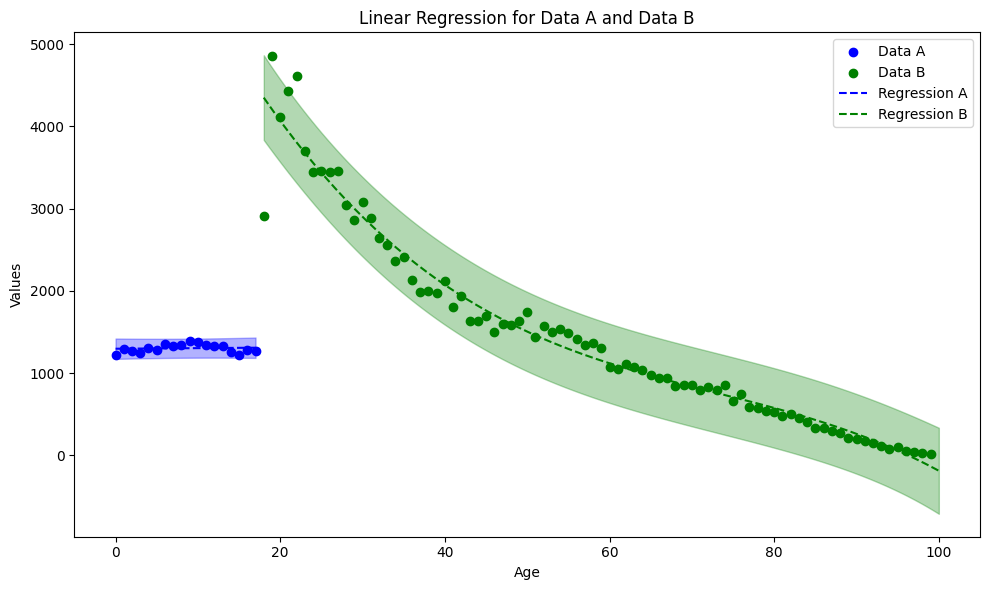

In [233]:
"""Splitting does make sense for Cambridge data since the children population is roughly uniformly distributed"""

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = np.array([[i] for i in range(100)])  # ages
y = age_df.loc['Cambridge']

# Split data into parts 'a' and 'b'
x_a = x[:18]
y_a = y[:18]
x_b = x[18:]
y_b = y[18:]

# Linear regression for part 'a'
x_a_design = np.concatenate((x_a, np.ones_like(x_a)), axis=1)
m_linear_a = sm.OLS(y_a, x_a_design)
results_a = m_linear_a.fit()

# Linear regression for part 'b'
x_b_design = np.concatenate(
    (
        x_b.reshape(-1, 1),
        np.power(x_b, 3).reshape(-1, 1),
        np.power(x_b, 2).reshape(-1, 1),
        np.ones_like(x_b).reshape(-1, 1),
    ),
    axis=1,
)
m_linear_b = sm.OLS(y_b, x_b_design)
results_b = m_linear_b.fit()

# Predictions for part 'a'
x_pred_a = np.linspace(0, 17, 100).reshape(-1, 1)
x_pred_a_design = np.concatenate((x_pred_a, np.ones_like(x_pred_a)), axis=1)
y_pred_a = results_a.get_prediction(x_pred_a_design).summary_frame(alpha=0.05)

# Predictions for part 'b'
x_pred_b = np.linspace(18, 100, 200).reshape(-1, 1)
x_pred_b_design = np.concatenate(
    (x_pred_b, np.power(x_pred_b, 3), np.power(x_pred_b, 2), np.ones_like(x_pred_b)),
    axis=1,
)
y_pred_b = results_b.get_prediction(x_pred_b_design).summary_frame(alpha=0.05)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plots
ax.scatter(x_a, y_a, color='blue', label='Data A', zorder=2)
ax.scatter(x_b, y_b, color='green', label='Data B', zorder=2)

# Part 'a' regression line and confidence intervals
ax.plot(x_pred_a, y_pred_a['mean'], color='blue', linestyle='--', label='Regression A', zorder=1)
ax.fill_between(
    x_pred_a.flatten(),
    y_pred_a['obs_ci_lower'],
    y_pred_a['obs_ci_upper'],
    color='blue',
    alpha=0.3,
    zorder=1,
)

# Part 'b' regression line and confidence intervals
ax.plot(x_pred_b, y_pred_b['mean'], color='green', linestyle='--', label='Regression B', zorder=1)
ax.fill_between(
    x_pred_b.flatten(),
    y_pred_b['obs_ci_lower'],
    y_pred_b['obs_ci_upper'],
    color='green',
    alpha=0.3,
    zorder=1,
)

# Plot formatting
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Values")
ax.set_title("Linear Regression for Data A and Data B")
plt.tight_layout()
plt.show()



In [ ]:
"""Regressions for clusters (not needed for practical)""""

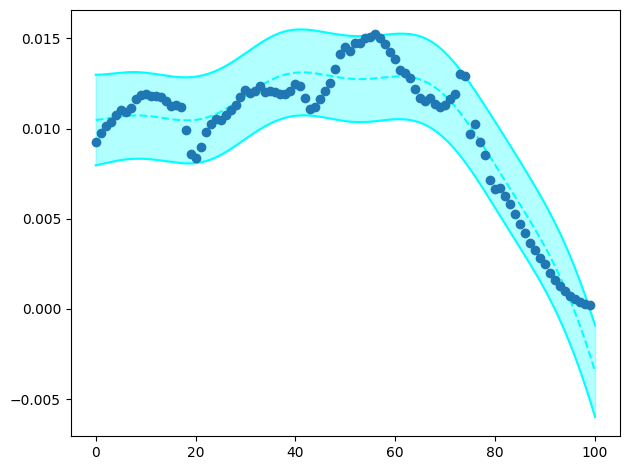

In [218]:
y = age_df_clustered[age_df_clustered['Cluster'] == 1].drop(['Cluster', 'PCA1', 'PCA2'], axis=1).sum(axis=0)
y = y/np.sum(y)
fit_ages_to_population(y)

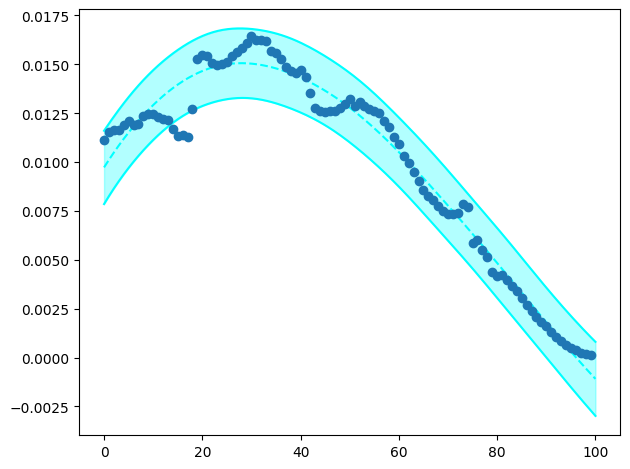

In [192]:
y = age_df_clustered[age_df_clustered['Cluster'] == 0].drop(['Cluster', 'PCA1', 'PCA2'], axis=1).sum(axis=0)
y = y/np.sum(y)
fit_ages_to_population(y)

During the check-session we will ask you a few questions on how you have reasoned when fitting the data.
Again, what we are looking for is motivation not "the best fit".

# Practical Modelling

## Linear modelling

You probably inferred in the previous exercise, that age-profiles of individual cities are heavilly impacted by students. Let's use data from the 2021 Census to try and predict age profile information of all cities.

What we actually will be predicting, is the share of population in a given city that is of a certain age, given NS-SEC information. Let's normalise the `age_df` and select the share of 21-year-olds in each city. This is the value we are trying to predict.

In [305]:
norm_age_df = age_df.div(age_df.sum(axis=1), axis=0)
norm_age_df[21]

,21
geography,
Hartlepool,0.010984
Middlesbrough,0.013739
Redcar and Cleveland,0.009384
Stockton-on-Tees,0.009223
Darlington,0.009621
...,...
Torfaen,0.008964
Monmouthshire,0.007328
Newport,0.010134


### Exercise 4

We don't have any data to make a model yet - let's change that. Select features to use, starting with the relative student population of each city (`L15` in `TS062`).

Make a LinearRegression model to find the relationship between the student population in a city, and the percentage of 21 year olds there. Use the model to make predictions and examine the predictive power by plotting the correlation of `y` and `y_pred`.

### Exercise 4

Write your answer to exercise 4 here

In [325]:
# Use this box for any code you need
download_census_data('TS062') # Age by single year of age

age_df = load_census_data('TS062', level='ltla')
age_df = age_df.set_index('geography')
student_pop = age_df.rename(columns={'National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students':'L15'})['L15']
total_pop = age_df.rename(columns={'National Statistics Socio-economic Classification (NS-SEC): Total: All usual residents aged 16 years and over':'Total'})['Total']
student_pop = student_pop.div(total_pop)


Files already exist at: census2021-ts062.


0.941822056940298


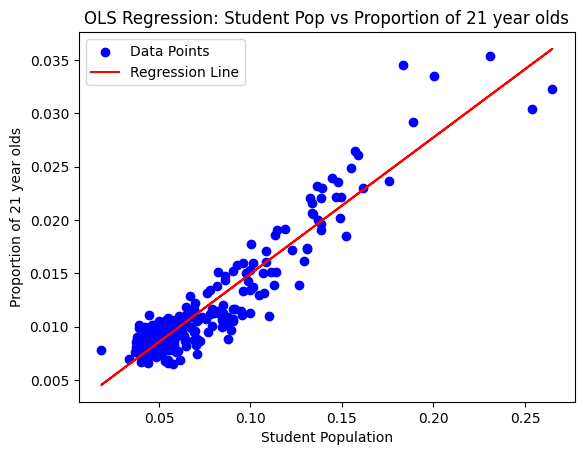

In [326]:

x_series = student_pop
y_series = norm_age_df[21]
df = pd.concat([x_series, y_series], axis=1)


X = df[0]  # Independent variable
y = df[21]   # Dependent variable

X = sm.add_constant(X)


model = sm.OLS(y, X)
results = model.fit()

y_pred = results.predict(X)
print(y_pred.corr(y))


plt.scatter(df[0], df[21], label='Data Points', color='blue')
plt.plot(df[0], y_pred, color='red', label='Regression Line')
plt.xlabel("Student Population")
plt.ylabel("Proportion of 21 year olds")
plt.legend()
plt.title("OLS Regression: Student Pop vs Proportion of 21 year olds")
plt.show()


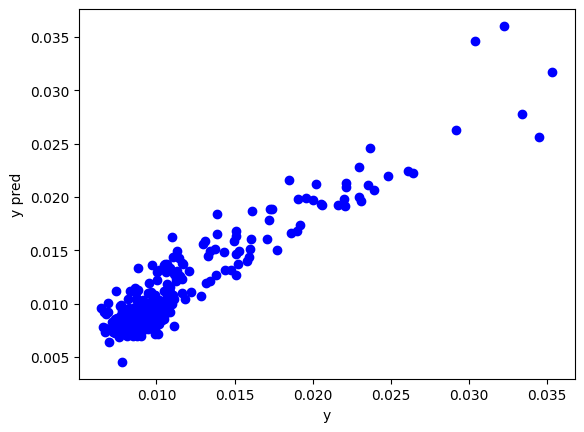

In [327]:
plt.scatter(y, y_pred, label='Data Points', color='blue')
plt.xlabel("y")
plt.ylabel("y pred")
plt.show()


### Exercise 5

Now repeat the above analysis using all 9 NS-SEC classification values as features. Interpret the results, including correlation. Does the new model perform better?

### Exercise 5

Write your answer to exercise 5 here

In [341]:
from re import A
# Use this box for any code you need
a = age_df.rename(columns={'National Statistics Socio-economic Classification (NS-SEC): L15 Full-time students':'L15',
                       'National Statistics Socio-economic Classification (NS-SEC): Total: All usual residents aged 16 years and over': 'total',
                       'National Statistics Socio-economic Classification (NS-SEC): L1, L2 and L3 Higher managerial, administrative and professional occupations':'L1-3',
                       'National Statistics Socio-economic Classification (NS-SEC): L4, L5 and L6 Lower managerial, administrative and professional occupations':'L4-6',
                       'National Statistics Socio-economic Classification (NS-SEC): L7 Intermediate occupations':'L7',
                       'National Statistics Socio-economic Classification (NS-SEC): L8 and L9 Small employers and own account workers':'L8-9',
                       'National Statistics Socio-economic Classification (NS-SEC): L10 and L11 Lower supervisory and technical occupations':'L10-11',
                       'National Statistics Socio-economic Classification (NS-SEC): L12 Semi-routine occupations':'L12',
                       'National Statistics Socio-economic Classification (NS-SEC): L13 Routine occupations':'L13',
                       'National Statistics Socio-economic Classification (NS-SEC): L14.1 and L14.2 Never worked and long-term unemployed':'L14'})
total = a['total']
a = a.drop(columns=['date', 'geography code', 'total'])
a = a.div(total, axis=0)
df = pd.concat([a, norm_age_df[21]], axis=1)
X = a  # Independent variable
y = norm_age_df[21]   # Dependent variable

X = sm.add_constant(X)
model = sm.OLS(df[21], X)
results = model.fit()

y_pred = results.predict(X)
print(y_pred.corr(y))

0.971638397254832


## Regularisation

The prediction results achieved by your second model should be more accurate, with a correlation of about 97%. However, when using as many parameters as we are (9), we need to be wary of overfitting.

### Exercise 6

Examine if the model is overfitting using *k-fold cross-validation*.

- Randomly split the dataset into *k* subsets.
- Train a model, leaving one selected subset out for testing. Record the test performance on that subset.
- Iterate this for all subsets.

Do the results you get differ depending on the value of *k*? Plot this relationship. Does this match your expectations?

### Exercise 6

Write your answer to exercise 6 here

In [ ]:
# Use this box for any code you need

### Exercise 7

If you found evidence of overfitting, address this by employing both L1 and L2 regularisation. Compare the results against your baseline model. How did you choose alpha values? What do the results say about potential feature selection?

### Exercise 7

Write your answer to exercise 7 here

In [ ]:
# Use this box for any code you need

## Prediction

### Exercise 8

Among the models created above, choose the one you believe performs *best*, and apply it to the entire dataset.

Fit a separate linear model for each of the age groups (0-99). Note down the model coefficients and plot them.

### Exercise 8

Write your answer to exercise 8 here

In [ ]:
# Use this box for any code you need

### Exercise 9

Write a function that given a cities' NS-SEC breakdown, predicts it's age profile, and plot's it against the ground truth.

Play around with the method to find cities where your model works very well, but also ones where it works poorly.

### Exercise 9

Write your answer to exercise 9 here

In [ ]:
# Use this box for any code you need

# Conclusions

This has been quite a short introduction to a set of very useful models. We have cut quite a few corners theoretically but importantly this is something that we have to do when working as data-scientist. We need to be able to apply models while there is still some uncertainty in how they work and be able to translate this uncertainty to how we interpret the results that we get. You are by no means expected to be experts on GLMs at all but you should be able to use them.

The next part of your challenge is now to include the models that we have built up and use them in the coursework. Try to first visualise the data, make a clear narrative of why you are selecting a specific model and try to use the tools that we derived her in order to provide context to the predictions that you make. The statsmodel package gives you a rich set of tools that you should be able to include directly into your project. Importantly, remember that the most important thing is to be able to say why a model does what it does not necessarily choosing the right model.

During the lecture Neil mentioned the idea that what separates statisticians from machine learners is that the former cares about β while the machine learners cares about $\hat{y}$ (the predictions). If you look at the statmodels package this concept becomes very clear. Using the GLM code as we did in the first exercise doesn’t actually provide us with the uncertainty in the predictions only in the parameters. It was because of this we changed from the GLM model class to OLS when using the basis functions.

## References

- McCullagh, P., & Nelder, J. A. (1989). *Generalized Linear Models*. London, UK: Chapman Hall / CRC.

- Rasmussen, Carl Edward, & Williams, Christopher K. I. (2006). *Gaussian Processes for Machine Learning* (Adaptive Computation and Machine Learning). The MIT Press.

- Silverman, B. W. (1985). "Some Aspects of the Spline Smoothing Approach To Non-Parametric Regression Curve Fitting". *Journal of the Royal Statistical Society: Series B (Methodological)*, 47(1), pp. 1–21.

- Vapnik, Vladimir N. (1999). *The Nature of Statistical Learning Theory*.
